<a href="https://colab.research.google.com/github/aida1986/introtodeeplearning/blob/master/Deep_Learning_classificatoin_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U tensorflow_datasets

Requirement already up-to-date: tensorflow_datasets in /usr/local/lib/python3.6/dist-packages (4.1.0)


In [1]:
from __future__ import  absolute_import, division, print_function

#import tensorflow and tensorflow dataset 
import tensorflow as tf 
import tensorflow_datasets as tfds

#helper libraries 
import math 
import numpy as np 
import matplotlib.pyplot as plt

#improve progress bar display 
import tqdm 
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

print (tf.__version__)
tf.compat.v1.enable_eager_execution()

2.3.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
# dataset, metadata= tfds.load("fashion_mnist", as_supervised=True, with_info=True)
# train_dataset, test_dataset= dataset ["train"],dataset["test"]

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [5]:
train_images.shape

(60000, 28, 28)

In [6]:
len (train_labels)

60000

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_labels)

10000

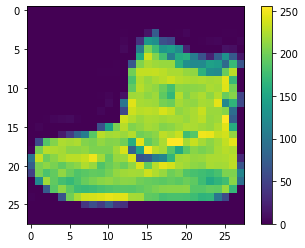

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

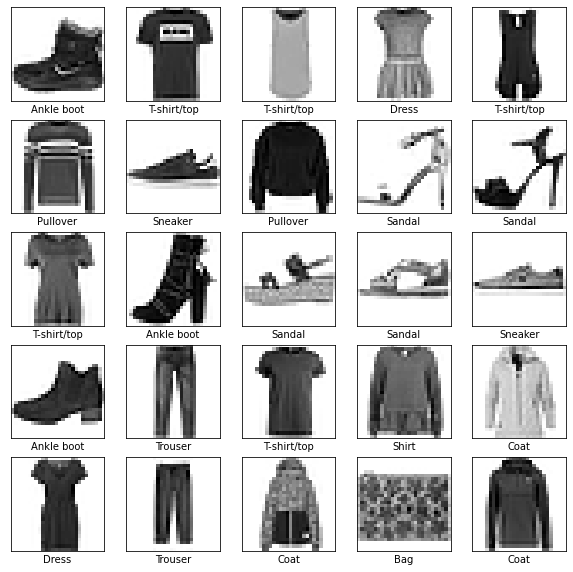

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()



In [12]:
#Build the model
#set up layers
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [13]:
model.compile( optimizer="Adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=["accuracy"])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4968 - accuracy: 0.8245
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3759 - accuracy: 0.8631
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3403 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3150 - accuracy: 0.8839
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2992 - accuracy: 0.8896
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2830 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2707 - accuracy: 0.9007
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2592 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2506 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

In [15]:
#evaluate accuracy with comparing how the model perform in test datasets 
test_loss, test_acc= model.evaluate(test_images, test_labels, verbose=2)
print ("\n Test accuracy", test_acc)

313/313 - 0s - loss: 0.3532 - accuracy: 0.8799

 Test accuracy 0.8798999786376953


In [23]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
prediction= probability_model.predict(test_images)
prediction [0]

array([1.8533713e-08, 1.7686678e-12, 1.4913788e-10, 1.8203210e-11,
       1.1825924e-09, 9.1833457e-02, 2.0654951e-09, 2.5332477e-03,
       6.1747736e-09, 9.0563333e-01], dtype=float32)

In [25]:
np.argmax(prediction[0])

9

NameError: ignored

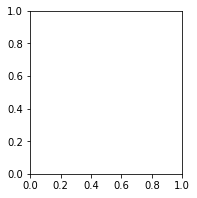

In [28]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

In [26]:
test_labels[0]

9

In [29]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

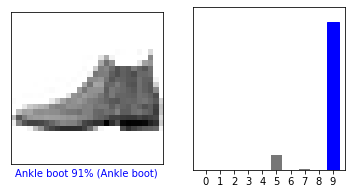

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

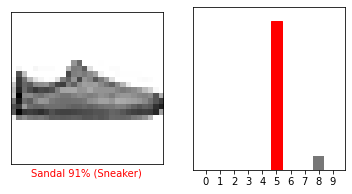

In [33]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, prediction[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, prediction[i],  test_labels)
plt.show()

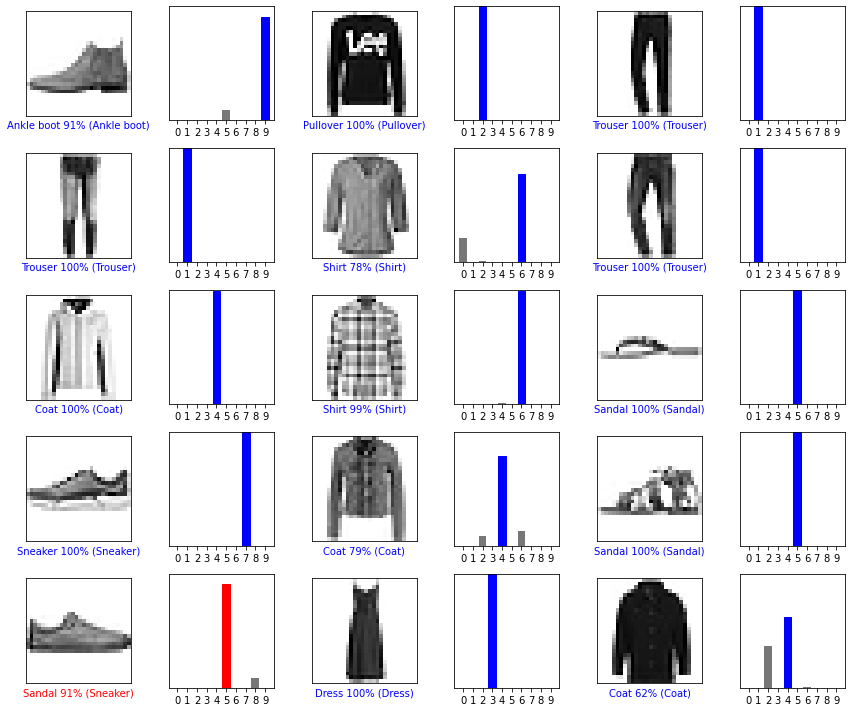

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], test_labels)
plt.tight_layout()
plt.show()

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [47]:
#dataset import 
dataset = pd.read_csv("train.csv")
#directory accordingly 
dataset.head (10)#return just 10 rows


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [48]:
X= dataset.iloc[:, 0:20].values
y= dataset.iloc[:, 20:21].values

In [49]:
#normalise data 
#https://scikit-learn.org/stable/modules/preprocessing.html
from sklearn.preprocessing import StandardScaler
# X = preprocessing.StandardScaler().fit(X)
X = StandardScaler().fit_transform(X)
print (X)

[[-0.90259726 -0.9900495   0.83077942 ... -1.78686097 -1.00601811
   0.98609664]
 [-0.49513857  1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 [-1.5376865   1.0100505  -1.2530642  ...  0.55964063  0.99401789
  -1.01409939]
 ...
 [ 1.53077336 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
  -1.01409939]
 [ 0.62252745 -0.9900495  -0.76274805 ...  0.55964063  0.99401789
   0.98609664]
 [-1.65833069  1.0100505   0.58562134 ...  0.55964063  0.99401789
   0.98609664]]


In [50]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(y).toarray()
print(y)


[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]


In [51]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1,random_state = 0)

In [86]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [87]:
#neural network
model= Sequential()
model.add (Dense(16, input_dim=20, activation="relu"))
model.add (Dense(12, activation="relu"))
model.add (Dense (4, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 16)                336       
_________________________________________________________________
dense_46 (Dense)             (None, 12)                204       
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 52        
Total params: 592
Trainable params: 592
Non-trainable params: 0
_________________________________________________________________


In [88]:
history = model.fit(X_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
29/29 [==============================] - 0s 2ms/step - loss: 1.4352 - accuracy: 0.2633
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 1.3749 - accuracy: 0.2856
Epoch 3/100
29/29 [==============================] - 0s 2ms/step - loss: 1.3349 - accuracy: 0.3222
Epoch 4/100
29/29 [==============================] - 0s 2ms/step - loss: 1.2938 - accuracy: 0.3550
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 1.2453 - accuracy: 0.4056
Epoch 6/100
29/29 [==============================] - 0s 2ms/step - loss: 1.1848 - accuracy: 0.4667
Epoch 7/100
29/29 [==============================] - 0s 2ms/step - loss: 1.1194 - accuracy: 0.5256
Epoch 8/100
29/29 [==============================] - 0s 3ms/step - loss: 1.0435 - accuracy: 0.5861
Epoch 9/100
29/29 [==============================] - 0s 2ms/step - loss: 0.9587 - accuracy: 0.6278
Epoch 10/100
29/29 [==============================] - 0s 3ms/step - loss: 0.8715 - accuracy: 0.6650
Epoch 11/

In [89]:
y_pred = model.predict(X_test)
#print(y_pred)
#Converting predictions to label
pred = list()
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))
#print (pred)

In [90]:
test = list()
for i in range(len(y_test)):
    test.append(np.argmax(y_test[i]))

In [91]:
from sklearn.metrics import accuracy_score

In [92]:
a= accuracy_score(pred, test)
print ("Accuracy is :",a*100)
history1 = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=100, batch_size=64)

Accuracy is : 93.0
Epoch 1/100
29/29 [==============================] - 0s 7ms/step - loss: 0.0499 - accuracy: 0.9906 - val_loss: 0.1792 - val_accuracy: 0.9300
Epoch 2/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9906 - val_loss: 0.1843 - val_accuracy: 0.9350
Epoch 3/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0473 - accuracy: 0.9894 - val_loss: 0.1850 - val_accuracy: 0.9300
Epoch 4/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9906 - val_loss: 0.1829 - val_accuracy: 0.9300
Epoch 5/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0447 - accuracy: 0.9917 - val_loss: 0.1800 - val_accuracy: 0.9450
Epoch 6/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0448 - accuracy: 0.9928 - val_loss: 0.1896 - val_accuracy: 0.9300
Epoch 7/100
29/29 [==============================] - 0s 3ms/step - loss: 0.0439 - accuracy: 0.9911 - val_loss: 0.1815 - val_accuracy: 0

KeyError: ignored

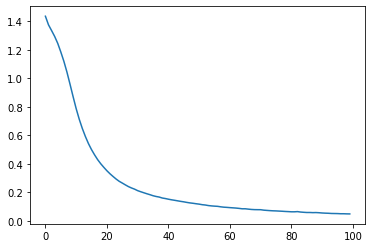

In [95]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Model loss') 
plt.ylabel('Loss') 
plt.xlabel('Epoch') 
plt.legend(['Train', 'Test'], loc='upper left') 
plt.show()